## Statistical Analysis
### Getting the endmember spectrum of soil carbon

Exercise for Xinyi: Find the F's and A's for the false dataset (the I's and partial A's) that I produced for you.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

"I" represented the reflectance spectra of soil from the RaCA dataset.

Let's load a fake RaCA dataset here for now and try to learn about it.

In [2]:
def loadRaCADataset() :
    # load the test dataset that Evan sent
    data=np.load('falseDataset_Exercise1_blinded.npz')
    return data['As'], data['Is'], data['Xaxis']

    #return np.zeros([NPoints,MSpectra])

#print(loadRaCADataset())

In [3]:
Adata,Idata,Xaxis = loadRaCADataset()
NPoints,MSpectra = Idata.shape
KEndmembers = 4 # I'm giving you this one

In [5]:
#xinyi trying to learn about data
#print(f'Adata shape is {Adata.shape}, Adata is {Adata}')
#print(f'Idata shape is {Idata.shape}, Idata is {Idata}')
#print(f'Xaxis shape is {Xaxis.shape}, Xaxis is {Xaxis}')

print(NPoints)
print(MSpectra)

100
100


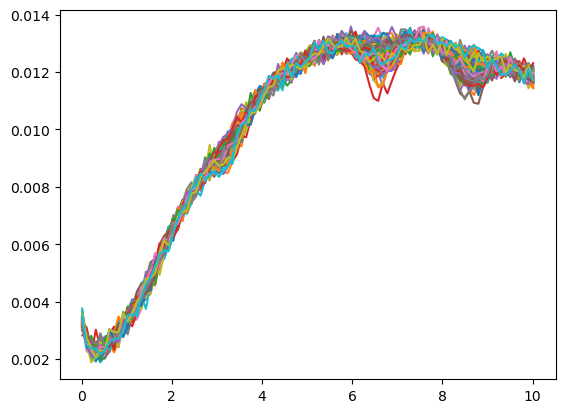

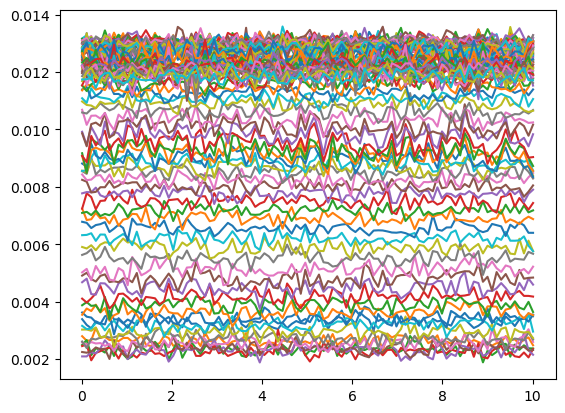

In [6]:
#look at the full I dataset
plt.plot(Xaxis, Idata.T) #targets #(n,m)
plt.show()

#without transpose #(m,n)
plt.plot(Xaxis, Idata)
plt.show()

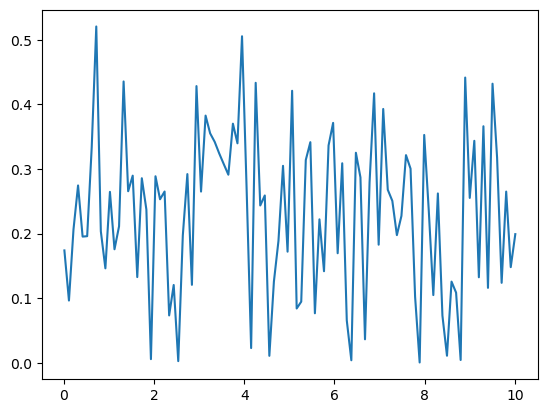

In [7]:
#look at the one set of A - (n,)
plt.plot(Xaxis, Adata)
plt.show()

"F" represented the endmember pure reflectance spectra from the ASD spectrometer. 

In [8]:
F = np.zeros([KEndmembers,MSpectra]) #specifying the shape of F, 2-D array
#print(f"F shape = {F.shape}, F = {F}")     #shape of F: (4, 100) -(k,m)

"A" represented the endmember number abundances from the ASD spectrometer.

In [9]:
A = np.zeros([KEndmembers,NPoints]) #specifying shape of A
#print(f"A shape = {A.shape}, A = {A}")     #check the shape of A: (4, 100) (k,n)
#print(f"A shape = {A.T.shape}, A.T = {A.T}")     #check the shape of A.T: (100,4) (n,k)

"Ihat" represented our estimates of the data given F and A.

In [10]:
def computeModel(tF, tA) :
    return np.dot(A.T,F) #A.T -> the transpose of the array

Ihat = computeModel(F,A)

#print(Ihat.shape) - (n,m)

"E" represented the error of our estimates to the RaCA data in I.

In [18]:
def computeL2Error(I,Ih) : #L2: mean of squared root error
    return np.sum(np.dot((I-Ih),(I-Ih).T)) #sum across all the data points

E = computeL2Error(Idata,Ihat)

print(E) #check the error

112.60743017403581


In [19]:
#sub in Ihat into E
I = Idata
E = np.sum(np.dot((I-np.dot(A.T,F)),(I-np.dot(A.T,F)).T))
print(E)

112.60743017403581


We want E to be as small as possible, as a function of our input parameters in F and A.

Exercise for Xinyi: Implement gradient descent assuming F and A contain all of our model parameters.

In [35]:
learningRate = 0.001

'''
def computeGradient(tI, tA, tF, tLearningRate) :
    # return gradient of E w.r.t. elements of A and F
    return np.zeros([KEndmembers,NPoints]), np.zeros([KEndmembers,MSpectra])

def minimizeError(tI, tA, tF, tLearningRate, nEpochs) : 
    for i in range(nEpochs) :
        dA, dF = computeGradient(tI, tA, tF, tLearningRate)
        tA = tA - tLearningRate * dA
        tF = tF - tLearningRate * dF
'''        

def computeGradient(tI, tA, tF, tLearningRate) :
    # return gradient of E w.r.t. elements of A and F
    # return np.zeros([KEndmembers,NPoints]), np.zeros([KEndmembers,MSpectra])

    '''
    Computes the gradient of E w.r.t. elements of A and F
    Args:
      I (ndarray (n,m)) : target values
      tI (ndarray (n,m)) : estimates of I
      tA (ndarray (k,n)) : model parameters  #tA.T (ndarray (n,k))
      tF (ndarray (k,m)) : model parameter
      #shape of np.dot(A.T, F) = (n,m)
      
    Returns:
      dA (ndarray (k,n)): The gradient of E w.r.t. the parameter A. 
      dF (ndarray (k,m)): The gradient of E w.r.t. the parameter F.
    
    #previous definitions
    F = np.zeros([KEndmembers,MSpectra])
    A = np.zeros([KEndmembers,NPoints])
    Ihat = computeModel(F,A) = np.dot(A.T,F)
    E = computeL2Error(Idata,Ihat) = np.sum(np.dot((I-Ihat),(I-Ihat).T))
    '''

    # Number of training examples
    m = MSpectra
    # Number of points on a spectrum
    n = NPoints
    #dA = np.zeros([KEndmembers,NPoints])
    #dF = np.zeros([KEndmembers,MSpectra])
    
    for i in range(m): 
        tI = np.dot(A.T[i],F[i])
        err = tI - I[i] #dimension: (n,m)
        #total_err_i = np.sum(tI - I[i])
        for j in range(n):
            dF[i] = 2 * np.dot(A, err.T)
            dA[j] = 2 * np.dot(F, err)
    return dA, dF

#print(computeGradient(Ihat, A, F, learningRate))

'''
def minimizeError(tI, tA, tF, tLearningRate, nEpochs) : 
    for i in range(nEpochs) :
        dA, dF = computeGradient(tI, tA, tF, tLearningRate)
        tA = tA - tLearningRate * dA
        tF = tF - tLearningRate * dF
              
        
print(computeGradient(Idata, A, F, learningRate))
'''

'\ndef minimizeError(tI, tA, tF, tLearningRate, nEpochs) : \n    for i in range(nEpochs) :\n        dA, dF = computeGradient(tI, tA, tF, tLearningRate)\n        tA = tA - tLearningRate * dA\n        tF = tF - tLearningRate * dF\n              \n        \nprint(computeGradient(Idata, A, F, learningRate))\n'

Down the road: We will implement an AdamOptimizer to do gradient descent for us. 